In [1]:
from synet.process.disease import simulate_disease, simulate_disease_start
from synet.generators import create_temporal_network
from synet.propagators.paint import paint_entropy
from synet.propagators.paths import path_entropy
from synet.propagators.mixing import mixing_entropy
from synet.analysis import entropy_dt

from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import spearmanr


In [2]:
p_infected = 0.033
n_agents = 40
n_intern = 101
all_p_intern = np.arange(n_intern)/(n_intern-1)
n_events = 100000
n_sample = 20000
max_dt = 200


In [3]:
methods = {
    "paint": paint_entropy,
    "path": path_entropy,
    "mix": mixing_entropy,
}


In [4]:
all_entropy_results = defaultdict(lambda: [])
all_disease_results = []

for p_intern in all_p_intern:
    A, event_list, participants = create_temporal_network(part_per_community=n_agents//2, p_intern=p_intern,
                                                          n_events=n_events)
    for method_name, method_fn in methods.items():
        res_dt = entropy_dt(A, max_dt=max_dt, entropy_game=method_fn)
        all_entropy_results[method_name].append(np.sum(res_dt))

    cur_results = np.zeros(n_events//2)
    for _ in range(n_sample):
        start = 1+np.random.randint(n_events//2-1)
        end = start + n_events//2
        cur_results += simulate_disease(participants, start, end, n_agents=n_agents, p_infected=p_infected)
    cur_results /= n_sample*n_agents
    all_disease_results.append(np.sum(cur_results))   
    print(p_intern)


0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.0


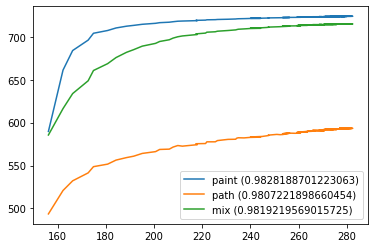

In [6]:
for method_name, results in all_entropy_results.items():
    res = spearmanr(all_disease_results, results).correlation
    plt.plot(all_disease_results, results, label=f"{method_name} ({res})")
plt.legend()
plt.show()